# (Ford GoBike System Data)
## by (Omar Ayman Hassan)

## Preliminary Wrangling

> the GoBike dataset from Ford and contains informations about different trips and their durations

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# First loading our data
df=pd.read_csv(r"E:\programming\advanced\visualization\project\fordgobike.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#know the structure of the dataset
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

- there are 6 columns contain missing value, and the last two columns their missing values are very         high

# Cleaning The Data

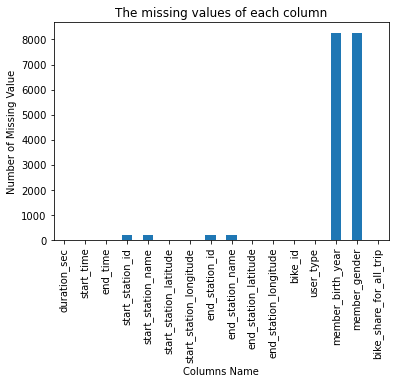

In [5]:
#visualize the missing value in each column
df.isna().sum().plot(kind="bar");
plt.xlabel("Columns Name")
plt.ylabel("Number of Missing Value")
plt.title("The missing values of each column");

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(174952, 16)

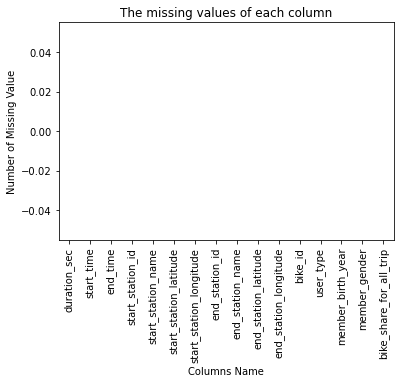

In [8]:
#Again we check to see if still there any missing values 
df.isna().sum().plot(kind="bar");
plt.xlabel("Columns Name")
plt.ylabel("Number of Missing Value")
plt.title("The missing values of each column");

 - no missing values present, and our data is clean 

# Data Wrangling 

In [9]:
# convert the duration from seconds to minutes
df["duration_sec"]=df["duration_sec"]/60

In [10]:
#rename the column of the duration
df.rename(columns={"duration_sec":"duration"},inplace=True)

In [11]:
df.shape

(174952, 16)

####  splitting the start_time and end_time into many columns
- start time will have 2 separated columns , one for the date and the other for the time
    - From the start_date , the year , month and the day extracted
- end time will have 2 separated columns , one for the date and the other for the time


In [12]:
#first conver the end_time column and start time column into datetime object
df[["start_time","end_time"]]=df[["start_time","end_time"]].apply(pd.to_datetime)


In [13]:
#make new column for start_time to extract the date from it
#make another new column for end_time to extract the date from it
df["start_date"]=pd.to_datetime(df["start_time"]).dt.date
df["end_date"]=pd.to_datetime(df["end_time"]).dt.date

In [14]:
#extracting the year , month , day from the start_date column
df["start_year"]=pd.to_datetime(df["start_date"]).dt.year
df["start_month"]=pd.to_datetime(df["start_date"]).dt.month
df["start_day"]=pd.to_datetime(df["start_date"]).dt.day

df["member_birth_year"]=df["member_birth_year"].astype(int)
df["start_year"]=df["start_year"].astype(int)
#forming age column 
# df["age"]=(pd.to_datetime(df["start_year"])-pd.datetime(df["member_birth_year"])).dt.year
df["age"]=df["start_year"] - df["member_birth_year"]


In [15]:
#adjust the 2 raw columns to display the hours and minutes and seconds
df["start_time"]=df["start_time"].dt.strftime("%H:%M:%S")
df["end_time"]=df["end_time"].dt.strftime("%H:%M:%S")

In [16]:
df.head()

,duration,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,start_year,start_month,start_day,age
0,869.750000,17:32:10,08:01:55,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,2019-02-28,2019-03-01,2019,2,28,35
2,1030.900000,12:13:13,05:24:08,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,2019-02-28,2019-03-01,2019,2,28,47
3,608.166667,17:54:26,04:02:36,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,2019-02-28,2019-03-01,2019,2,28,30
4,26.416667,23:54:18,00:20:44,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,2019-02-28,2019-03-01,2019,2,28,45
5,29.883333,23:49:58,00:19:51,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,2019-02-28,2019-03-01,2019,2,28,60


In [17]:
df.shape

(174952, 22)

### What is the structure of your dataset?

> it consists of 174592 row and 21 columns 

### What is/are the main feature(s) of interest in your dataset?

> comparing between the different genders in term of fitness, income

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [18]:
sb.set_style("darkgrid")
co=sb.color_palette()[0]

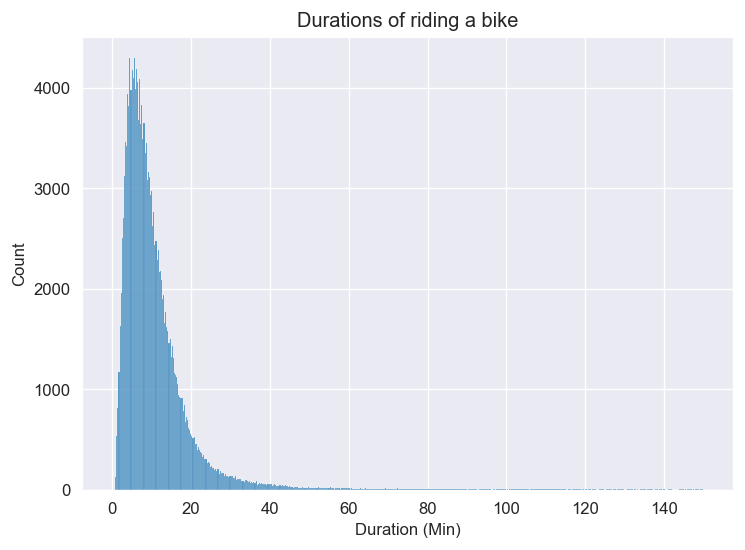

In [19]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=120)

sb.histplot(data = df , x="duration",binrange=(0,150),ax=ax);
plt.title("Durations of riding a bike")
plt.xlabel("Duration (Min)");

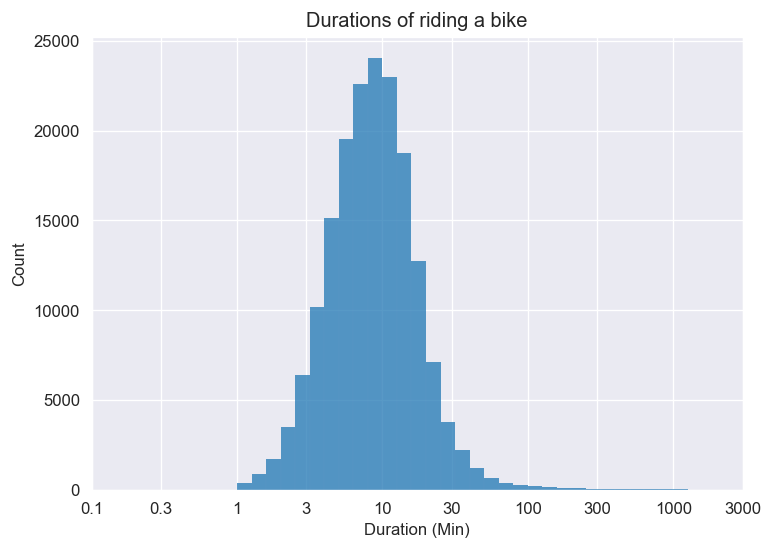

In [20]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=120)

b=10**np.arange(0,3.1+0.1,0.1)
sb.histplot(data = df , x="duration",bins=b)
# plt.xlim(0,200);
plt.xscale("log")

tick=[0.1,0.3,1,3,10,30,100,300,1000,3000]
lab=[f"{v}" for v in tick]
plt.xticks(tick,lab)
plt.title("Durations of riding a bike")
plt.xlabel("Duration (Min)");

  - most of people their avg trip take almost 10-15 min

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

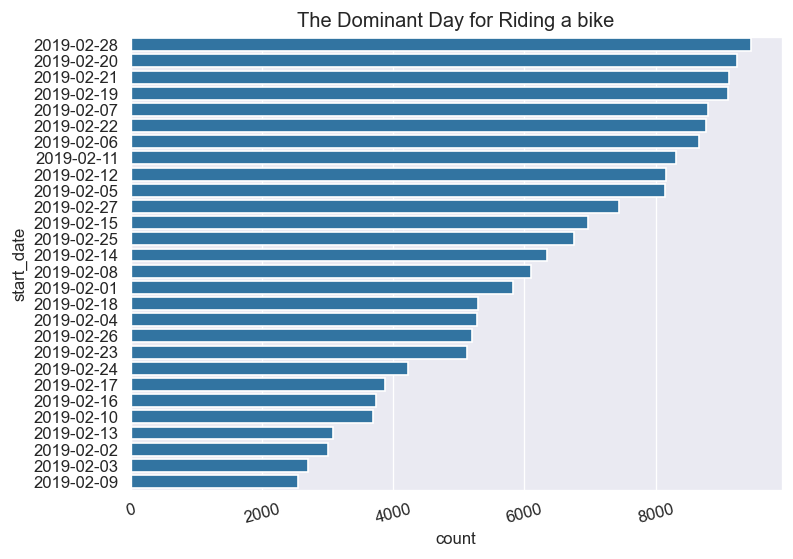

In [21]:
co=sb.color_palette()[0]
fig, ax = plt.subplots(figsize=(7, 5), dpi=120)
sb.countplot(data=df , y="start_date",ax=ax ,
             order=df.start_date.value_counts().index,
           color=co );
plt.xticks(rotation=15);
plt.title("The Dominant Day for Riding a bike");


- it seems that the last few days of the month are days of riding bikes

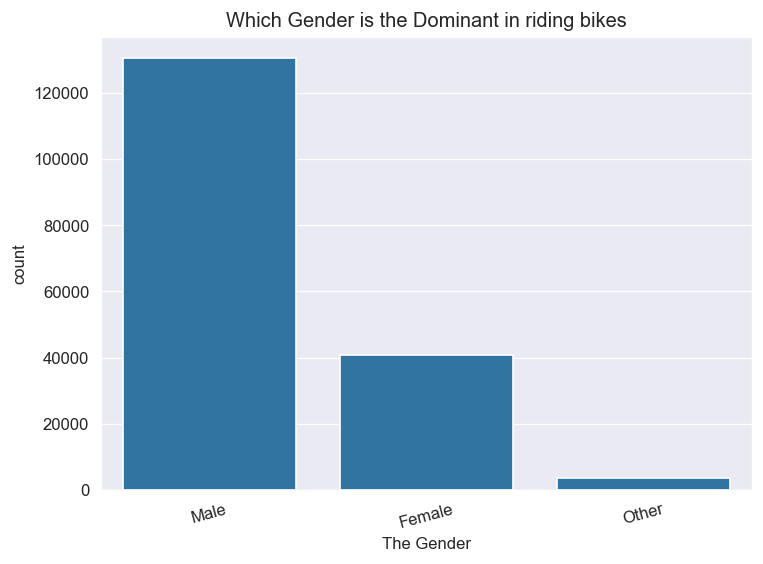

In [22]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=120)
sb.countplot(data=df , x="member_gender",ax=ax ,
             order=df.member_gender.value_counts().index,
            color=co);
plt.xticks(rotation=15);
plt.title("Which Gender is the Dominant in riding bikes")
plt.xlabel("The Gender");

- the Males are the dominant Gender in riding bikes

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the males are the gender who is more dominant in riding bikes and thats predictable 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i have extracted the dates , time to get the age of each person riding a bike and to see if there is a correlation between the age and the duration of riding a bike or not 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

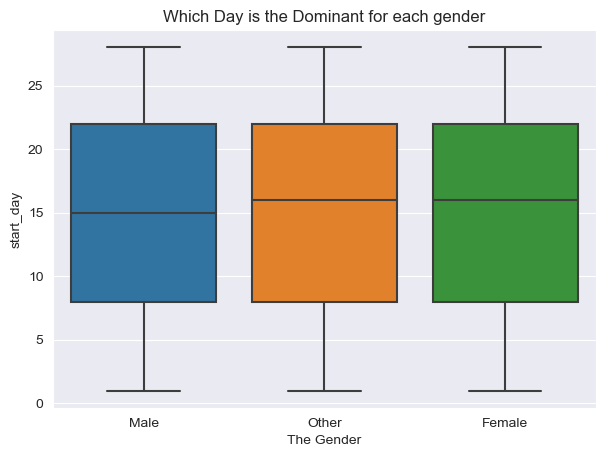

In [91]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)

sb.boxplot(data=df , y="start_day" ,x="member_gender");


plt.title("Which Day is the Dominant for each gender")
plt.xlabel("The Gender");

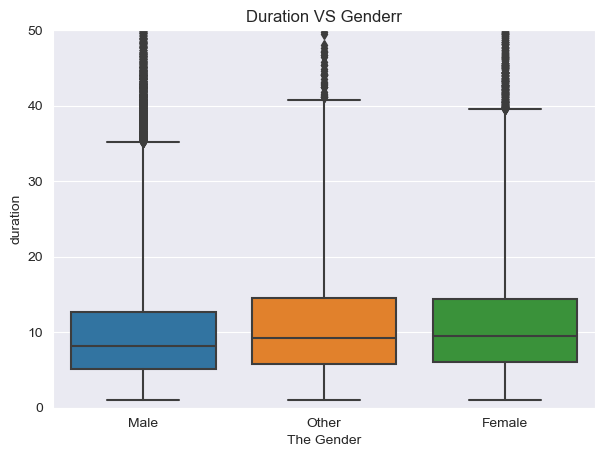

In [97]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)

sb.boxplot(data=df , y="duration" ,x="member_gender",
              whis=3
             );
plt.ylim(0,50)

plt.title("Duration VS Genderr")
plt.xlabel("The Gender");

    - the trip duration for females and other gender are slightly higher than the males

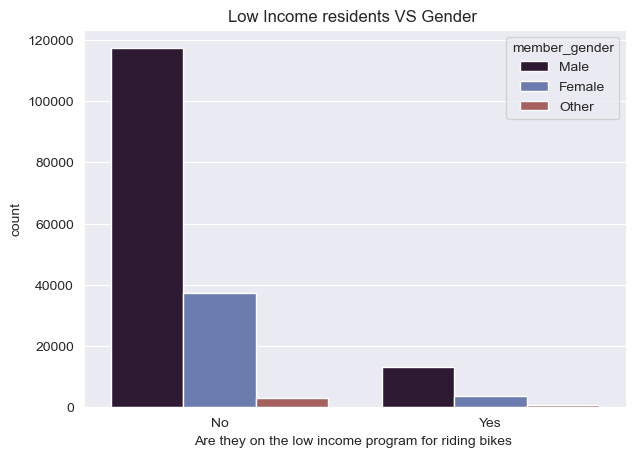

In [99]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)

#Selecting specific color for each column 


sb.color_palette("twilight",3)[:3]
colors={"Male":(0.18488035509396164, 0.07942573027972388, 0.21307651648984993),
       "Female" :(0.38407269378943537, 0.46139018782416635, 0.7309466543290268),
       "Other" : (0.6980608153581771, 0.3382897632604862, 0.3220747885521809)}
sb.countplot(data=df , x="bike_share_for_all_trip",
             hue="member_gender" ,
             hue_order=["Male","Female","Other"],
            palette=colors);

plt.title("Low Income residents VS Gender ")
plt.xlabel("Are they on the low income program for riding bikes ");

 - bike_share_for_all_trip : which tracks members who are enrolled in the Bike Share for All program for low-income residents.


In [59]:
df.bike_share_for_all_trip.value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

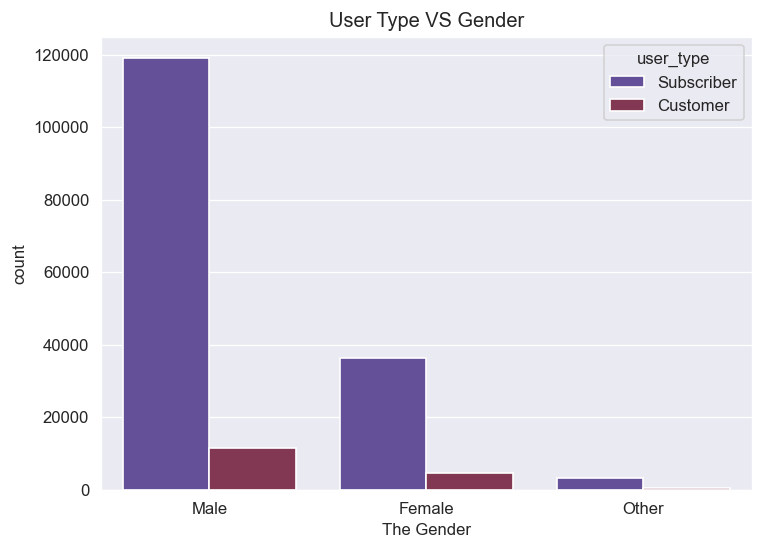

In [56]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=120)
sb.countplot(data=df , x="member_gender",ax=ax ,
             order=df.member_gender.value_counts().index,
             hue="user_type",
             hue_order=["Subscriber","Customer"],
             palette="twilight"
            )
plt.title("User Type VS Gender")
plt.xlabel("The Gender");

 - accorindg to each Gender Category 
     - the great portion of each gender is subscriber and thats indicates , most of people regardeless their gender, like riding bikes and can be considerd as a hobby 

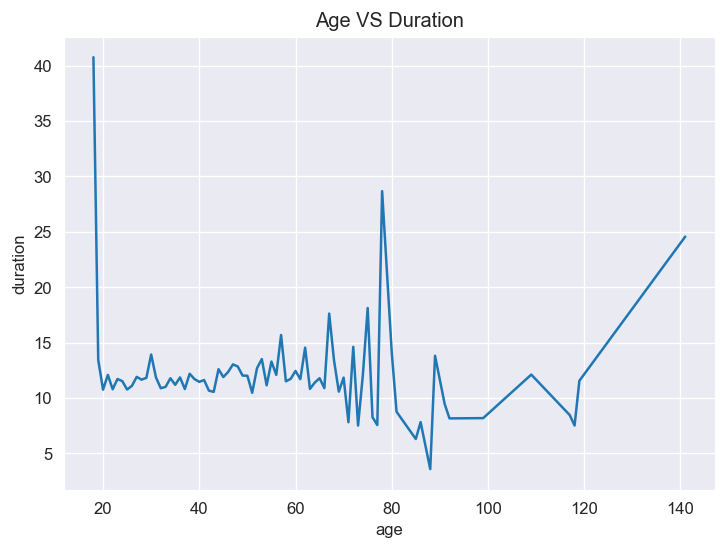

In [73]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=120)

sb.lineplot(data=df , x="age" , y="duration",ax=ax,ci=None)
plt.title("Age VS Duration");

- there are people over 50 years old and riding bikes for 25 min !!



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> the age is just a number ! , as there are many people exceed 50 years old and they are riding bikes for along duration

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

<AxesSubplot:>

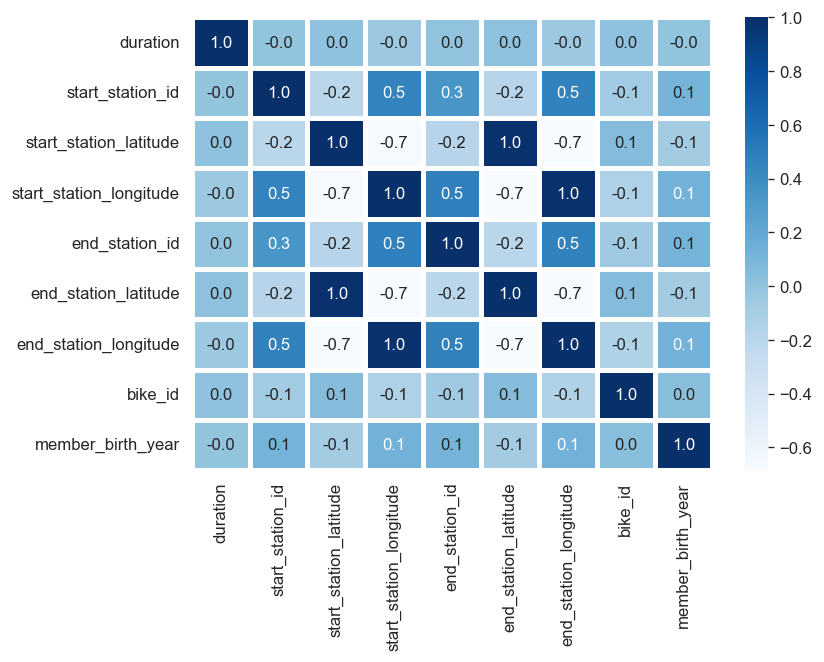

In [52]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=120)
df_1=df.iloc[:,:18]
sb.heatmap(data=df_1.corr(),annot=True ,fmt=".1f",linewidth=2 ,cmap="Blues")

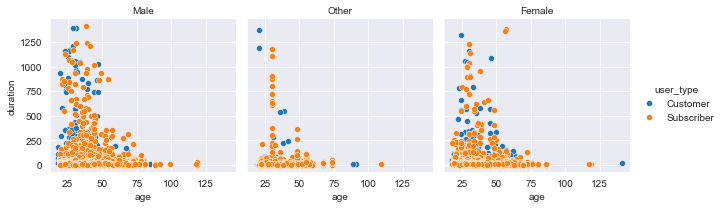

In [100]:
g=sb.FacetGrid(data = df , col="member_gender" ,hue="user_type");
g.map_dataframe(sb.scatterplot , x="age",y="duration",palette="prism")
g.set_titles(col_template="{col_name}" , row_template="{row_name}")
g.add_legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> inspite of males are the more in riding bikes , the females have duration in riding bikes more than the males.

### Were there any interesting or surprising interactions between features?

> there are people over 50 years old and riding bikes for along time!!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!